# Урок 4. Сверточные нейронные сети
## Вариант 1. (простой)

## Обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar10

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model

from keras import models as m

import os

import matplotlib.pyplot as plt

import numpy as np

In [28]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [3]:
labels = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
          5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [4]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

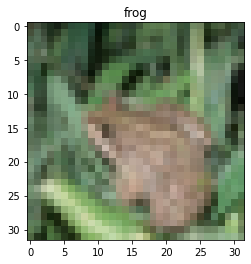

In [29]:
N = 4

plt.imshow(X_test[N])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

In [6]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [7]:
model.save('./sequential_model.h5')

In [8]:
# Обучаем модель
hist = model.fit(x=X_train,y=y_train, epochs=5,
                 batch_size=512, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/5
98/98 [==============================] - 7s 39ms/step - loss: 5.4635 - accuracy: 0.1136 - val_loss: 2.3005 - val_accuracy: 0.1057
Epoch 2/5
98/98 [==============================] - 3s 31ms/step - loss: 2.2802 - accuracy: 0.1321 - val_loss: 2.2619 - val_accuracy: 0.1494
Epoch 3/5
98/98 [==============================] - 3s 30ms/step - loss: 2.2592 - accuracy: 0.1429 - val_loss: 2.2989 - val_accuracy: 0.1082
Epoch 4/5
98/98 [==============================] - 3s 30ms/step - loss: 2.2280 - accuracy: 0.1612 - val_loss: 2.1806 - val_accuracy: 0.1809
Epoch 5/5
98/98 [==============================] - 3s 30ms/step - loss: 2.2047 - accuracy: 0.1739 - val_loss: 2.1658 - val_accuracy: 0.1845


In [9]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 4ms/step - loss: 2.1658 - accuracy: 0.1845
Test loss 2.1658, accuracy 18.45%


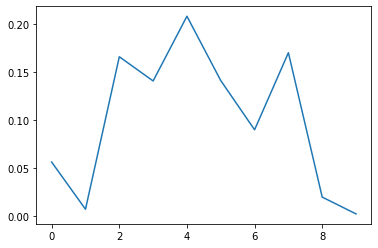

[0.05613666 0.00705835 0.16575204 0.14056793 0.20791851 0.14096177
 0.08975054 0.16997428 0.01969698 0.00218292]


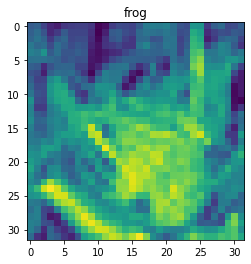

In [10]:
y_pred = model.predict(X_test)
plt.plot(y_pred[N][:])
plt.show()
print(y_pred[N][:])
plt.imshow(X_test[N][:,:,0])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

In [11]:
model = m.load_model('./sequential_model.h5')
hist = model.fit(x=X_train,y=y_train, epochs=25,
                 batch_size=128, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/25
391/391 [==============================] - 6s 13ms/step - loss: 5.4654 - accuracy: 0.1326 - val_loss: 2.2676 - val_accuracy: 0.1866
Epoch 2/25
391/391 [==============================] - 5s 12ms/step - loss: 2.2351 - accuracy: 0.1780 - val_loss: 2.2021 - val_accuracy: 0.1841
Epoch 3/25
391/391 [==============================] - 5s 12ms/step - loss: 2.2473 - accuracy: 0.1559 - val_loss: 2.2518 - val_accuracy: 0.1408
Epoch 4/25
391/391 [==============================] - 4s 11ms/step - loss: 2.1552 - accuracy: 0.1924 - val_loss: 2.0694 - val_accuracy: 0.2335
Epoch 5/25
391/391 [==============================] - 5s 12ms/step - loss: 2.0640 - accuracy: 0.2259 - val_loss: 1.9755 - val_accuracy: 0.2713
Epoch 6/25
391/391 [==============================] - 5s 12ms/step - loss: 1.9660 - accuracy: 0.2645 - val_loss: 1.8463 - val_accuracy: 0.3166
Epoch 7/25
391/391 [==============================] - 5s 12ms/step - loss: 1.8823 - accuracy: 0.3033 - val_loss: 1.7584 - val_accuracy: 0.3508

In [12]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 4ms/step - loss: 1.4141 - accuracy: 0.5018
Test loss 1.4141, accuracy 50.18%


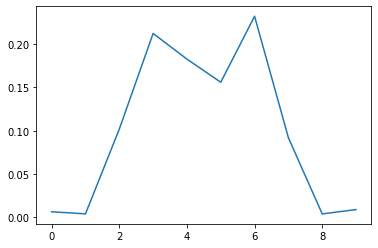

[0.00649752 0.00412163 0.10183968 0.21215416 0.18253334 0.15587652
 0.2319825  0.09192107 0.00403136 0.00904223]


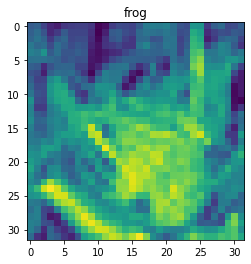

In [13]:
y_pred = model.predict(X_test)
plt.plot(y_pred[N][:])
plt.show()
print(y_pred[N][:])
plt.imshow(X_test[N][:,:,0])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

In [14]:
model = m.load_model('./sequential_model.h5')
hist = model.fit(x=X_train,y=y_train, epochs=25,
                 batch_size=16, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/25
3125/3125 [==============================] - 21s 7ms/step - loss: 1795809251902357504.0000 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/25
3125/3125 [==============================] - 19s 6ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/25
3125/3125 [==============================] - 20s 6ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/25
3125/3125 [==============================] - 19s 6ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/25
3125/3125 [==============================] - 20s 6ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/25
3125/3125 [==============================] - 21s 7ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/25
3125/3125 [==============================] - 19s 6ms/step - loss: 2.3027 - accuracy: 0.1001 - val_los

In [15]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 2s 6ms/step - loss: 2.3026 - accuracy: 0.1000
Test loss 2.3026, accuracy 10.00%


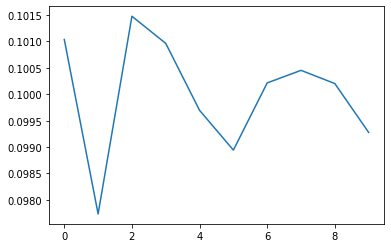

[0.10103722 0.09773471 0.10147738 0.10096356 0.09969581 0.09894285
 0.10021517 0.10045305 0.10020273 0.09927756]


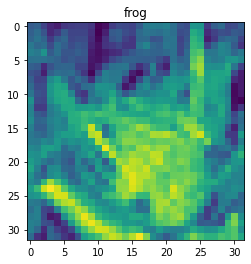

In [18]:
y_pred = model.predict(X_test)
plt.plot(y_pred[N][:])
plt.show()
print(y_pred[N][:])
plt.imshow(X_test[N][:,:,0])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

In [20]:
model = m.load_model('./sequential_model.h5')
hist = model.fit(x=X_train,y=y_train, epochs=25,
                 batch_size=32, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/25
1563/1563 [==============================] - 12s 7ms/step - loss: 31903757802572068750062780416.0000 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/25
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3027 - accuracy: 0.0961 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/25
1563/1563 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.0964 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/25
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/25
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/25
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/25
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3027 - accuracy: 0.0985

In [21]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Test loss 2.3026, accuracy 10.00%


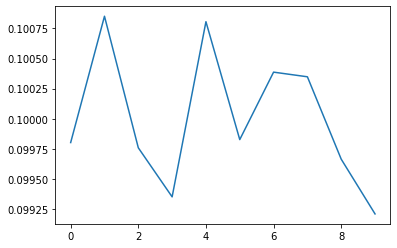

[0.09980134 0.10085187 0.09975786 0.09934983 0.10080653 0.09982602
 0.10038701 0.10034836 0.09966326 0.09920797]


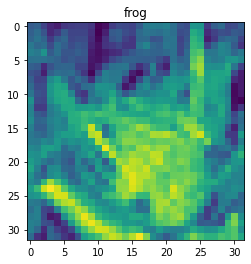

In [22]:
y_pred = model.predict(X_test)
plt.plot(y_pred[N][:])
plt.show()
print(y_pred[N][:])
plt.imshow(X_test[N][:,:,0])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

In [46]:
tf.keras.backend.clear_session()
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [47]:
# Обучаем модель
hist = model.fit(x=X_train,y=y_train, epochs=25,
                 batch_size=64, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/25
782/782 [==============================] - 7s 8ms/step - loss: 4.7441 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/25
782/782 [==============================] - 6s 7ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 3/25
782/782 [==============================] - 6s 7ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 4/25
782/782 [==============================] - 6s 7ms/step - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/25
782/782 [==============================] - 6s 7ms/step - loss: 2.3025 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/25
782/782 [==============================] - 6s 7ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 7/25
782/782 [==============================] - 6s 7ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 

In [33]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Test loss 2.3026, accuracy 10.00%


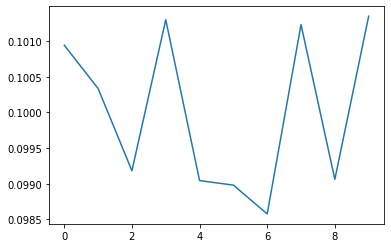

[0.10094208 0.10033513 0.09918138 0.10130101 0.09904338 0.09897925
 0.09857552 0.10123222 0.0990606  0.10134937]


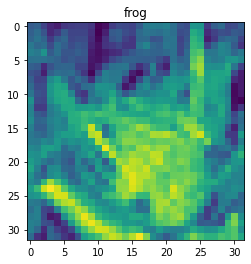

In [34]:
y_pred = model.predict(X_test)
plt.plot(y_pred[N][:])
plt.show()
print(y_pred[N][:])
plt.imshow(X_test[N][:,:,0])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

Заметка:
- выбирая разные типы процессорных типов (None - насколько понимаю это эквивалент классическому CPU; TPU; GPU), самый быстрый был GPU, хотя работа ведется с тензорами;
- есть ощущение, что команда load_model загружает предобученную модель, кроме того tf.keras.backend.clear_session() не избавляет от этого ощущения;
- следующий пункт будет выполняться с перезагрузкой данных и использования другой переменной для модели, чтобы избежать эффекта из предыдущего пункта и лучшие, на текущий момент, показатели epochs=25, batch_size=128.

## Оценить рост точности при увеличении ширины сети (больше ядер)

In [48]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [49]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

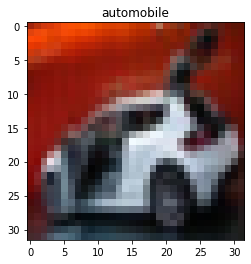

In [50]:
N = 6

plt.imshow(X_test[N])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

In [51]:
# конфигурирование слоев нейросети
model2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model2.add(Activation('relu')) # активацию можно прописывать как в самом слое, так и отдельно
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# полносвязные слои нейронной сети
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model2.add(Flatten()) 
# полносвязный слой
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10))
# выходной слой с функцией активации softmax
model2.add(Activation('softmax'))

model2.summary()

# компиляция модели
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 activation_7 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 64)        0         
                                                      

In [52]:
model2.save('./sequential_morekernels_model.h5')

In [53]:
# Обучаем модель
hist = model2.fit(x=X_train,y=y_train, epochs=25,
                 batch_size=128, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/25
391/391 [==============================] - 8s 18ms/step - loss: nan - accuracy: 0.0998 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/25
391/391 [==============================] - 7s 17ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/25
391/391 [==============================] - 7s 17ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/25
391/391 [==============================] - 7s 17ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/25
391/391 [==============================] - 7s 17ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/25
391/391 [==============================] - 7s 17ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/25
391/391 [==============================] - 7s 17ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 8/25
391/391 [=====================

In [54]:
test_score = model2.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Test loss nan, accuracy 10.00%


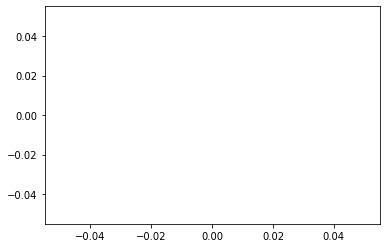

[nan nan nan nan nan nan nan nan nan nan]


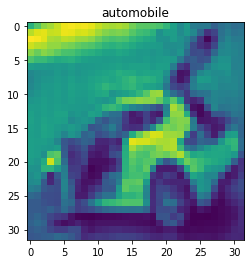

In [56]:
y_pred = model2.predict(X_test)
plt.plot(y_pred[N][:])
plt.show()
print(y_pred[N][:])
plt.imshow(X_test[N][:,:,0])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

Заметка: поскольку присвоение новой переменной model2 и перезагрузка не дала желаемого результата, более того, в процессе тренироуки модели loss был nan на протяжении всей тренировки, принял решение проводить следующие пункты в отдельных файлах.

